# 1. Reading Data

In [45]:
# Import General Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from fastai.imports import *
# from fastai.structured import *
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
# from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Dropout, Activation
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

In [ ]:
#reading data
df = pd.read_csv("/Users/rakeshravi/Downloads/UCI_Credit_Card.csv")
df["MARRIAGE"].replace([0], 3, inplace=True)
df["EDUCATION"].replace([0,5,6], 4, inplace=True)
collist = ['AGE','SEX','EDUCATION','MARRIAGE']
for col in collist:
    df[col] = df[col].astype('category',copy=False)

##  Artificial Neural Network

In [13]:
#data prep for Neural Network

#converting sex, marriage, age and education into one-hot
df = pd.get_dummies(df)
df.rename(columns={'default.payment.next.month':'default'}, inplace=True)
y = df["default"]
df = df.drop(["default"], axis = 1)

#train and test splitting
def split_vals(a,n): 
    return a[:n].copy(), a[n:].copy()

n_valid = 5000  
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train_IDs = X_train["ID"]
X_train.drop(["ID"], axis = 1, inplace = True)
X_valid_IDs = X_valid["ID"]
X_valid.drop(["ID"], axis = 1, inplace = True)

#standardising training and testing datasets to ensure that features are normalized
X_train = StandardScaler().fit_transform(X_train)
X_valid = StandardScaler().fit_transform(X_valid)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
X_train.shape

(25000, 84)

## Iteration 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=84, activation="relu", kernel_initializer="uniform")`
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, activation="relu", kernel_initializer="uniform")`
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  import sys


Epoch 1/10
25000/25000 [==============================] - 2s 76us/step - loss: 0.5541 - acc: 0.7766
Epoch 2/10
25000/25000 [==============================] - 1s 55us/step - loss: 0.5306 - acc: 0.7769
Epoch 3/10
25000/25000 [==============================] - 1s 54us/step - loss: 0.5299 - acc: 0.7769
Epoch 4/10
25000/25000 [==============================] - 1s 55us/step - loss: 0.5266 - acc: 0.7769
Epoch 5/10
25000/25000 [==============================] - 2s 65us/step - loss: 0.5009 - acc: 0.7806: 0s - loss: 0.5152 - acc: - ETA: 0s - loss: 0.5100 - a
Epoch 6/10
25000/25000 [==============================] - 1s 60us/step - loss: 0.4634 - acc: 0.8047
Epoch 7/10
25000/25000 [==============================] - 2s 62us/step - loss: 0.4565 - acc: 0.8098
Epoch 8/10
25000/25000 [==============================] - 1s 54us/step - loss: 0.4540 - acc: 0.8127
Epoch 9/10
25000/25000 [==============================] - 1s 57us/step - loss: 0.4522 - acc: 0.8157: 0s - loss: 0.4475 - a
Epoch 10/10
25000/2500

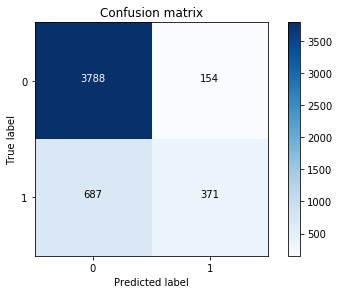

precision: 70.66666666666667
recall: 35.06616257088847
false positive rate: 3.9066463723997966
accuracy 83.17999999999999
F1-score 0.4687302590018952
AUC 0.6557975809924435


In [32]:
#ANN model building and fitting
#optimizer - sgd
#drop in layers
model = Sequential()
model.add(Dense(12, input_dim=84, init='uniform', activation='relu'))
model.add(Dense(20, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=16,  verbose=1)
predictions = model.predict(X_valid)
rounded = [round(x[0]) for x in predictions]


#confusion Matrix
cm = confusion_matrix(y_valid, rounded)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm , classes=class_names, title='Confusion matrix')
plt.show()
tn, fp, fn, tp = cm.ravel()
precision=tp/(tp+fp)
recall=tp/(tp+fn)
fpr = fp/(fp+ tn)
accuracy = (tp + tn)/(tn + tp + fn + fp)
F1 = 2 * (precision * recall) / (precision + recall)
Fpr, tpr, thresholds = roc_curve(y_valid, rounded)
roc_auc = auc(Fpr,tpr)
print("precision:", precision*100)
print("recall:", recall*100)
print("false positive rate:", fpr*100)
print("accuracy",  accuracy*100)
print("F1-score", F1)
print("AUC", roc_auc)

## Iteration 2

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=84, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, activation="relu", kernel_initializer="uniform")`
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


Epoch 1/10
25000/25000 [==============================] - 2s 82us/step - loss: 0.4973 - acc: 0.7768: 0s - loss: 0.4990 - acc:
Epoch 2/10
25000/25000 [==============================] - 2s 68us/step - loss: 0.4804 - acc: 0.7826
Epoch 3/10
25000/25000 [==============================] - 2s 62us/step - loss: 0.4750 - acc: 0.7968
Epoch 4/10
25000/25000 [==============================] - 2s 73us/step - loss: 0.4683 - acc: 0.8022: 0s - loss: 0.4689 - acc: 0.80
Epoch 5/10
25000/25000 [==============================] - 2s 72us/step - loss: 0.4658 - acc: 0.8026
Epoch 6/10
25000/25000 [==============================] - 1s 59us/step - loss: 0.4622 - acc: 0.8090
Epoch 7/10
25000/25000 [==============================] - 2s 65us/step - loss: 0.4597 - acc: 0.8091
Epoch 8/10
25000/25000 [==============================] - 2s 71us/step - loss: 0.4573 - acc: 0.8099: 0s - loss: 0.4585
Epoch 9/10
25000/25000 [==============================] - 2s 72us/step - loss: 0.4564 - acc: 0.8100
Epoch 10/10
25000/25000 

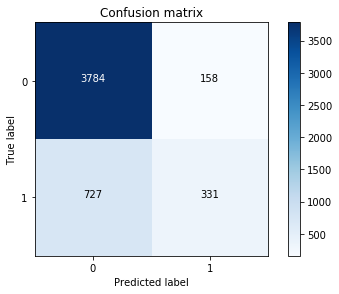

precision: 67.68916155419224
recall: 31.285444234404537
false positive rate: 4.008117706747844
accuracy 82.3
F1-score 0.42792501616031026
AUC 0.6363866326382834


In [31]:
#ANN model building and fitting
#optimizer - rmsprop
model = Sequential()
model.add(Dense(12, input_dim=84, init='uniform', activation='relu'))
model.add(Dense(20, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=16,  verbose=1)
predictions = model.predict(X_valid)
rounded = [round(x[0]) for x in predictions]


#confusion Matrix
cm = confusion_matrix(y_valid, rounded)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm , classes=class_names, title='Confusion matrix')
plt.show()
tn, fp, fn, tp = cm.ravel()
precision=tp/(tp+fp)
recall=tp/(tp+fn)
fpr = fp/(fp+ tn)
accuracy = (tp + tn)/(tn + tp + fn + fp)
F1 = 2 * (precision * recall) / (precision + recall)
Fpr, tpr, thresholds = roc_curve(y_valid, rounded)
roc_auc = auc(Fpr,tpr)
print("precision:", precision*100)
print("recall:", recall*100)
print("false positive rate:", fpr*100)
print("accuracy",  accuracy*100)
print("F1-score", F1)
print("AUC", roc_auc)

## Iteration 3

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=84, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, activation="relu", kernel_initializer="uniform")`
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


Epoch 1/10
25000/25000 [==============================] - 3s 104us/step - loss: 0.4930 - acc: 0.7846
Epoch 2/10
25000/25000 [==============================] - 2s 75us/step - loss: 0.4676 - acc: 0.8083
Epoch 3/10
25000/25000 [==============================] - 2s 70us/step - loss: 0.4599 - acc: 0.8124
Epoch 4/10
25000/25000 [==============================] - 2s 71us/step - loss: 0.4538 - acc: 0.8150
Epoch 5/10
25000/25000 [==============================] - 2s 68us/step - loss: 0.4503 - acc: 0.8148
Epoch 6/10
25000/25000 [==============================] - 2s 79us/step - loss: 0.4474 - acc: 0.8159
Epoch 7/10
25000/25000 [==============================] - 2s 69us/step - loss: 0.4466 - acc: 0.8165
Epoch 8/10
25000/25000 [==============================] - 2s 70us/step - loss: 0.4454 - acc: 0.8158: 1s - loss
Epoch 9/10
25000/25000 [==============================] - 2s 66us/step - loss: 0.4451 - acc: 0.8150
Epoch 10/10
25000/25000 [==============================] - 2s 65us/step - loss: 0.4441 -

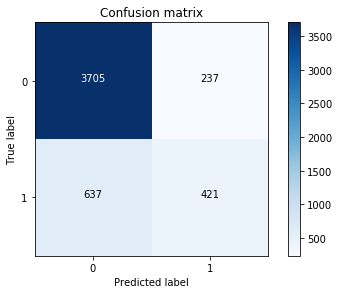

precision: 63.981762917933125
recall: 39.79206049149339
false positive rate: 6.012176560121765
accuracy 82.52000000000001
F1-score 0.49067599067599066
AUC 0.6688994196568581


In [30]:
#ANN model building and fitting
#optimizer - adam
model = Sequential()
model.add(Dense(12, input_dim=84, init='uniform', activation='relu'))
model.add(Dense(20, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=16,  verbose=1)
predictions = model.predict(X_valid)
rounded = [round(x[0]) for x in predictions]


#confusion Matrix
cm = confusion_matrix(y_valid, rounded)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm , classes=class_names, title='Confusion matrix')
plt.show()
tn, fp, fn, tp = cm.ravel()
precision=tp/(tp+fp)
recall=tp/(tp+fn)
fpr = fp/(fp+ tn)
accuracy = (tp + tn)/(tn + tp + fn + fp)
F1 = 2 * (precision * recall) / (precision + recall)
Fpr, tpr, thresholds = roc_curve(y_valid, rounded)
roc_auc = auc(Fpr,tpr)
print("precision:", precision*100)
print("recall:", recall*100)
print("false positive rate:", fpr*100)
print("accuracy",  accuracy*100)
print("F1-score", F1)
print("AUC", roc_auc)

## Iteration 4

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, input_dim=84, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, activation="relu", kernel_initializer="uniform")`
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="uniform")`
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="relu", kernel_initializer="uniform")`
  
/anacon

Epoch 1/10
25000/25000 [==============================] - 3s 139us/step - loss: 0.4968 - acc: 0.7766
Epoch 2/10
25000/25000 [==============================] - 2s 97us/step - loss: 0.4773 - acc: 0.7858
Epoch 3/10
25000/25000 [==============================] - 3s 106us/step - loss: 0.4741 - acc: 0.7982 0s - loss: 0.4747 - a
Epoch 4/10
25000/25000 [==============================] - 2s 92us/step - loss: 0.4726 - acc: 0.8026
Epoch 5/10
25000/25000 [==============================] - 2s 93us/step - loss: 0.4697 - acc: 0.8057
Epoch 6/10
25000/25000 [==============================] - 3s 107us/step - loss: 0.4595 - acc: 0.8111
Epoch 7/10
25000/25000 [==============================] - 3s 116us/step - loss: 0.4532 - acc: 0.8108
Epoch 8/10
25000/25000 [==============================] - 3s 110us/step - loss: 0.4505 - acc: 0.8118
Epoch 9/10
25000/25000 [==============================] - 3s 110us/step - loss: 0.4476 - acc: 0.8129
Epoch 10/10
25000/25000 [==============================] - 3s 108us/step

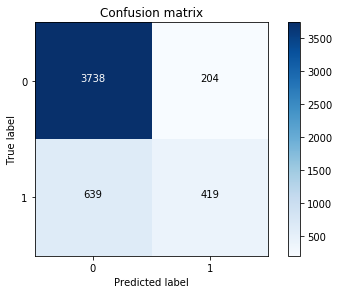

precision: 67.25521669341894
recall: 39.603024574669185
false positive rate: 5.175038051750381
accuracy 83.14
F1-score 0.4985127900059489
AUC 0.672139932614594


In [36]:
#ANN model building and fitting
#picking a basic configuration
#slow decrement of units to learn more from each layer
model = Sequential()
model.add(Dense(50, input_dim=84, init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(20, init='uniform', activation='relu'))
model.add(Dense(10, init='uniform', activation='relu'))
model.add(Dense(5, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=16,  verbose=1)
predictions = model.predict(X_valid)
rounded = [round(x[0]) for x in predictions]

#confusion Matrix
cm = confusion_matrix(y_valid, rounded)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm , classes=class_names, title='Confusion matrix')
plt.show()
tn, fp, fn, tp = cm.ravel()
precision=tp/(tp+fp)
recall=tp/(tp+fn)
fpr = fp/(fp+ tn)
accuracy = (tp + tn)/(tn + tp + fn + fp)
F1 = 2 * (precision * recall) / (precision + recall)
Fpr, tpr, thresholds = roc_curve(y_valid, rounded)
roc_auc = auc(Fpr,tpr)
print("precision:", precision*100)
print("recall:", recall*100)
print("false positive rate:", fpr*100)
print("accuracy",  accuracy*100)
print("F1-score", F1)
print("AUC", roc_auc)

## Iteration 5

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, input_dim=84, activation="relu", kernel_initializer="uniform")`
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, activation="relu", kernel_initializer="uniform")`
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="uniform")`
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':
/anaconda3/lib/pyt

Epoch 1/10
25000/25000 [==============================] - 1s 46us/step - loss: 0.5557 - acc: 0.7769
Epoch 2/10
25000/25000 [==============================] - 0s 13us/step - loss: 0.4794 - acc: 0.7769
Epoch 3/10
25000/25000 [==============================] - 0s 13us/step - loss: 0.4723 - acc: 0.7769
Epoch 4/10
25000/25000 [==============================] - 0s 13us/step - loss: 0.4653 - acc: 0.7808
Epoch 5/10
25000/25000 [==============================] - 0s 13us/step - loss: 0.4572 - acc: 0.8146
Epoch 6/10
25000/25000 [==============================] - 0s 13us/step - loss: 0.4528 - acc: 0.8137
Epoch 7/10
25000/25000 [==============================] - 0s 13us/step - loss: 0.4501 - acc: 0.8152
Epoch 8/10
25000/25000 [==============================] - 0s 13us/step - loss: 0.4475 - acc: 0.8156
Epoch 9/10
25000/25000 [==============================] - 0s 13us/step - loss: 0.4459 - acc: 0.8154
Epoch 10/10
25000/25000 [==============================] - 0s 13us/step - loss: 0.4438 - acc: 0.8164

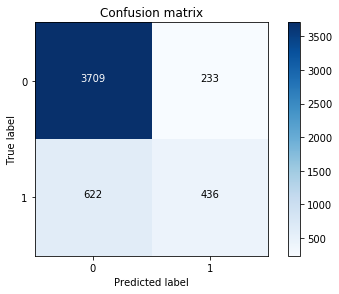

precision: 65.17189835575485
recall: 41.209829867674856
false positive rate: 5.910705225773719
accuracy 82.89999999999999
F1-score 0.504921829762594
AUC 0.6764956232095057


In [37]:
#ANN model building and fitting
#picking a basic configuration
#slow decrement of units to learn more from each layer
#increasing batch size to 128 to get a larger read of data
model = Sequential()
model.add(Dense(50, input_dim=84, init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(20, init='uniform', activation='relu'))
model.add(Dense(10, init='uniform', activation='relu'))
model.add(Dense(5, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=128,  verbose=1)
predictions = model.predict(X_valid)
rounded = [round(x[0]) for x in predictions]

#confusion Matric
cm = confusion_matrix(y_valid, rounded)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm , classes=class_names, title='Confusion matrix')
plt.show()
tn, fp, fn, tp = cm.ravel()
precision=tp/(tp+fp)
recall=tp/(tp+fn)
fpr = fp/(fp+ tn)
accuracy = (tp + tn)/(tn + tp + fn + fp)
F1 = 2 * (precision * recall) / (precision + recall)
Fpr, tpr, thresholds = roc_curve(y_valid, rounded)
roc_auc = auc(Fpr,tpr)
print("precision:", precision*100)
print("recall:", recall*100)
print("false positive rate:", fpr*100)
print("accuracy",  accuracy*100)
print("F1-score", F1)
print("AUC", roc_auc)

## Iteration 6 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, input_dim=84, activation="relu", kernel_initializer="uniform")`
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, activation="relu", kernel_initializer="uniform")`
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from

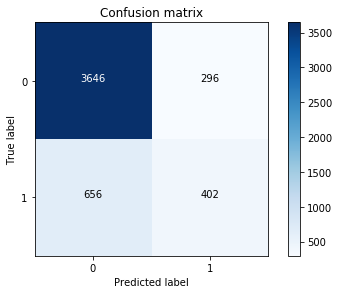

precision: 57.59312320916905
recall: 37.99621928166352
false positive rate: 7.508878741755454
accuracy 80.96
F1-score 0.4578587699316628
AUC 0.6524367026995403


In [43]:
#ANN model building and fitting
#picking a basic configuration
#slow decrement of units to learn more from each layer
#increasing batch size to 128 to get a larger read of data
#increasing the number of epochs to cover a larger chunk of data
model = Sequential()
model.add(Dense(50, input_dim=84, init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(20, init='uniform', activation='relu'))
model.add(Dense(10, init='uniform', activation='relu'))
model.add(Dense(5, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=128,  verbose=0)
predictions = model.predict(X_valid)
rounded = [round(x[0]) for x in predictions]

#confusion Matric
cm = confusion_matrix(y_valid, rounded)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm , classes=class_names, title='Confusion matrix')
plt.show()
tn, fp, fn, tp = cm.ravel()
precision=tp/(tp+fp)
recall=tp/(tp+fn)
fpr = fp/(fp+ tn)
accuracy = (tp + tn)/(tn + tp + fn + fp)
F1 = 2 * (precision * recall) / (precision + recall)
Fpr, tpr, thresholds = roc_curve(y_valid, rounded)
roc_auc = auc(Fpr,tpr)
print("precision:", precision*100)
print("recall:", recall*100)
print("false positive rate:", fpr*100)
print("accuracy",  accuracy*100)
print("F1-score", F1)
print("AUC", roc_auc)

## Iteration 7

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, input_dim=84, activation="relu", kernel_initializer="uniform")`
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="relu", kernel_initi

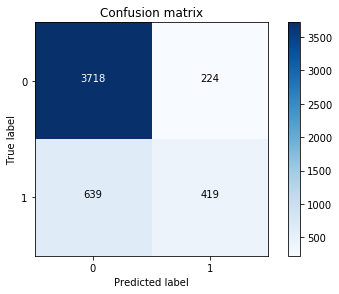

precision: 65.16329704510109
recall: 39.603024574669185
false positive rate: 5.682394723490614
accuracy 82.74000000000001
F1-score 0.49265138154027033
AUC 0.6696031492558929


In [47]:
#looks like we might have overfit the data
#picking a basic configuration
#slow decrement of units to learn more from each layer
#increasing batch size to 128 to get a larger read of data
model = Sequential()
model.add(Dense(50, input_dim=84, init='uniform', activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(20, init='uniform', activation='relu'))
model.add(Dense(10, init='uniform', activation='relu'))
model.add(Dense(5, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=128,  verbose=0)
predictions = model.predict(X_valid)
rounded = [round(x[0]) for x in predictions]

#confusion Matric
cm = confusion_matrix(y_valid, rounded)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm , classes=class_names, title='Confusion matrix')
plt.show()
tn, fp, fn, tp = cm.ravel()
precision=tp/(tp+fp)
recall=tp/(tp+fn)
fpr = fp/(fp+ tn)
accuracy = (tp + tn)/(tn + tp + fn + fp)
F1 = 2 * (precision * recall) / (precision + recall)
Fpr, tpr, thresholds = roc_curve(y_valid, rounded)
roc_auc = auc(Fpr,tpr)
print("precision:", precision*100)
print("recall:", recall*100)
print("false positive rate:", fpr*100)
print("accuracy",  accuracy*100)
print("F1-score", F1)
print("AUC", roc_auc)

In [21]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
